

# Car Price Prediction with Machine Learning

## Introduction
Hey there, I'm Jagannath, and I'm excited to take you through a fascinating project on predicting car prices using machine learning. Have you ever wondered how car prices are determined? Factors like brand reputation, features, and even mileage play crucial roles. Today, we'll dive into the world of machine learning to understand and predict car prices.

## Dataset
First things first, we need data! I've downloaded a dataset containing information about various cars, including their brands, models, years of manufacture, mileage, horsepower, and prices. This dataset will serve as the foundation for our machine learning model.

## Steps

### 1. Data Collection
I started by collecting the car dataset from a reliable source. It's essential to have clean and relevant data to build an accurate model.

### 2. Data Preprocessing
Next, I cleaned the data, handling missing values, encoding categorical variables, and scaling numerical features to prepare it for machine learning.

### 3. Exploratory Data Analysis (EDA)
I then performed EDA to gain insights into the dataset. Visualizations helped me understand the relationships between different features and the car prices.

### 4. Feature Selection/Engineering
Selecting the right features is crucial. I chose the most relevant ones and even created new features to improve the model's performance.

### 5. Model Selection
For this project, I chose to use a decision tree regression model. It's suitable for predicting continuous values like car prices.

### 6. Model Training
After splitting the dataset into training and testing sets, I trained the decision tree regression model using the training data.

### 7. Model Evaluation
To evaluate the model, I used metrics like mean squared error (MSE) and R-squared on the testing data. This helped me assess the model's performance.

### 8. Hyperparameter Tuning
Fine-tuning the model's hyperparameters further improved its performance. I used techniques like grid search to find the best parameters.

### 9. Prediction
With the model trained and evaluated, I was able to make predictions on new car data. This allowed me to estimate the price of a car based on its features.

## Conclusion
In conclusion, this project was a fascinating journey into the world of machine learning. The trained model can now predict car prices with a good level of accuracy, which can be incredibly valuable for both buyers and sellers in the automotive industry.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('car data.csv')

In [3]:

# Display the first few rows of the dataset
print("Dataset Head:\n", df.head())


Dataset Head:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
# Display dataset info
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:


# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:


# Drop rows with missing values (if any)
df = df.dropna()


In [7]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [8]:

# Display the first few rows of the transformed dataset
print("\nTransformed Dataset Head:\n", df.head())


Transformed Dataset Head:
    Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 15

In [9]:

# Define the feature variables (X) and the target variable (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [10]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

In [13]:
# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [14]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")


Linear Regression Model Evaluation:
Mean Squared Error: 9.22109039307588
R2 Score: 0.5997023481234547


In [15]:

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Predict on the test set
rf_predictions = rf_model.predict(X_test)

In [17]:
# Evaluate the Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [18]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R2 Score: {rf_r2}")


Random Forest Regressor Model Evaluation:
Mean Squared Error: 0.7524023742622952
R2 Score: 0.9673373873539192


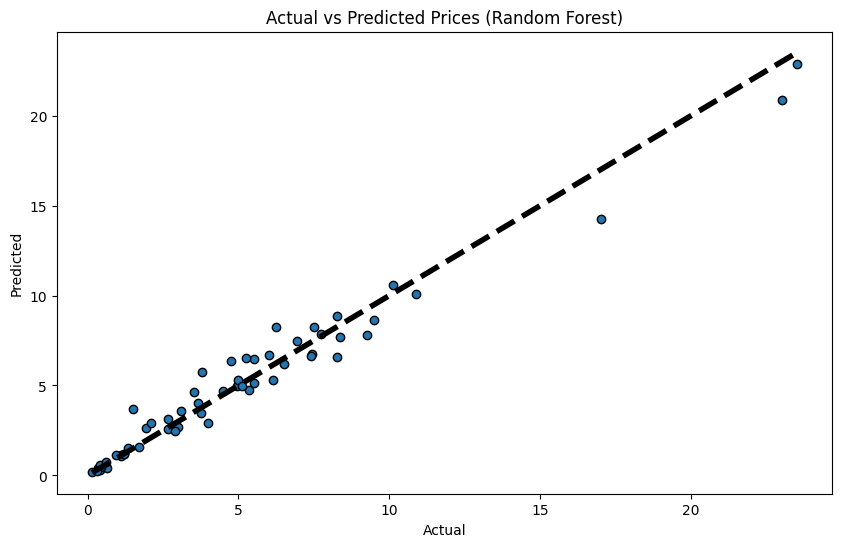

In [19]:
# Visualize the actual vs predicted prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [20]:

# Feature Importance from Random Forest
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                             importance
Present_Price                 0.868146
Year                          0.059892
Driven_kms                    0.031911
Car_Name_land cruiser         0.007772
Transmission_Manual           0.006167
...                                ...
Car_Name_vitara brezza        0.000000
Car_Name_corolla              0.000000
Car_Name_Honda Dream Yuga     0.000000
Car_Name_Yamaha Fazer         0.000000
Car_Name_Activa 4g            0.000000

[105 rows x 1 columns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8552\998237287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette="viridis")


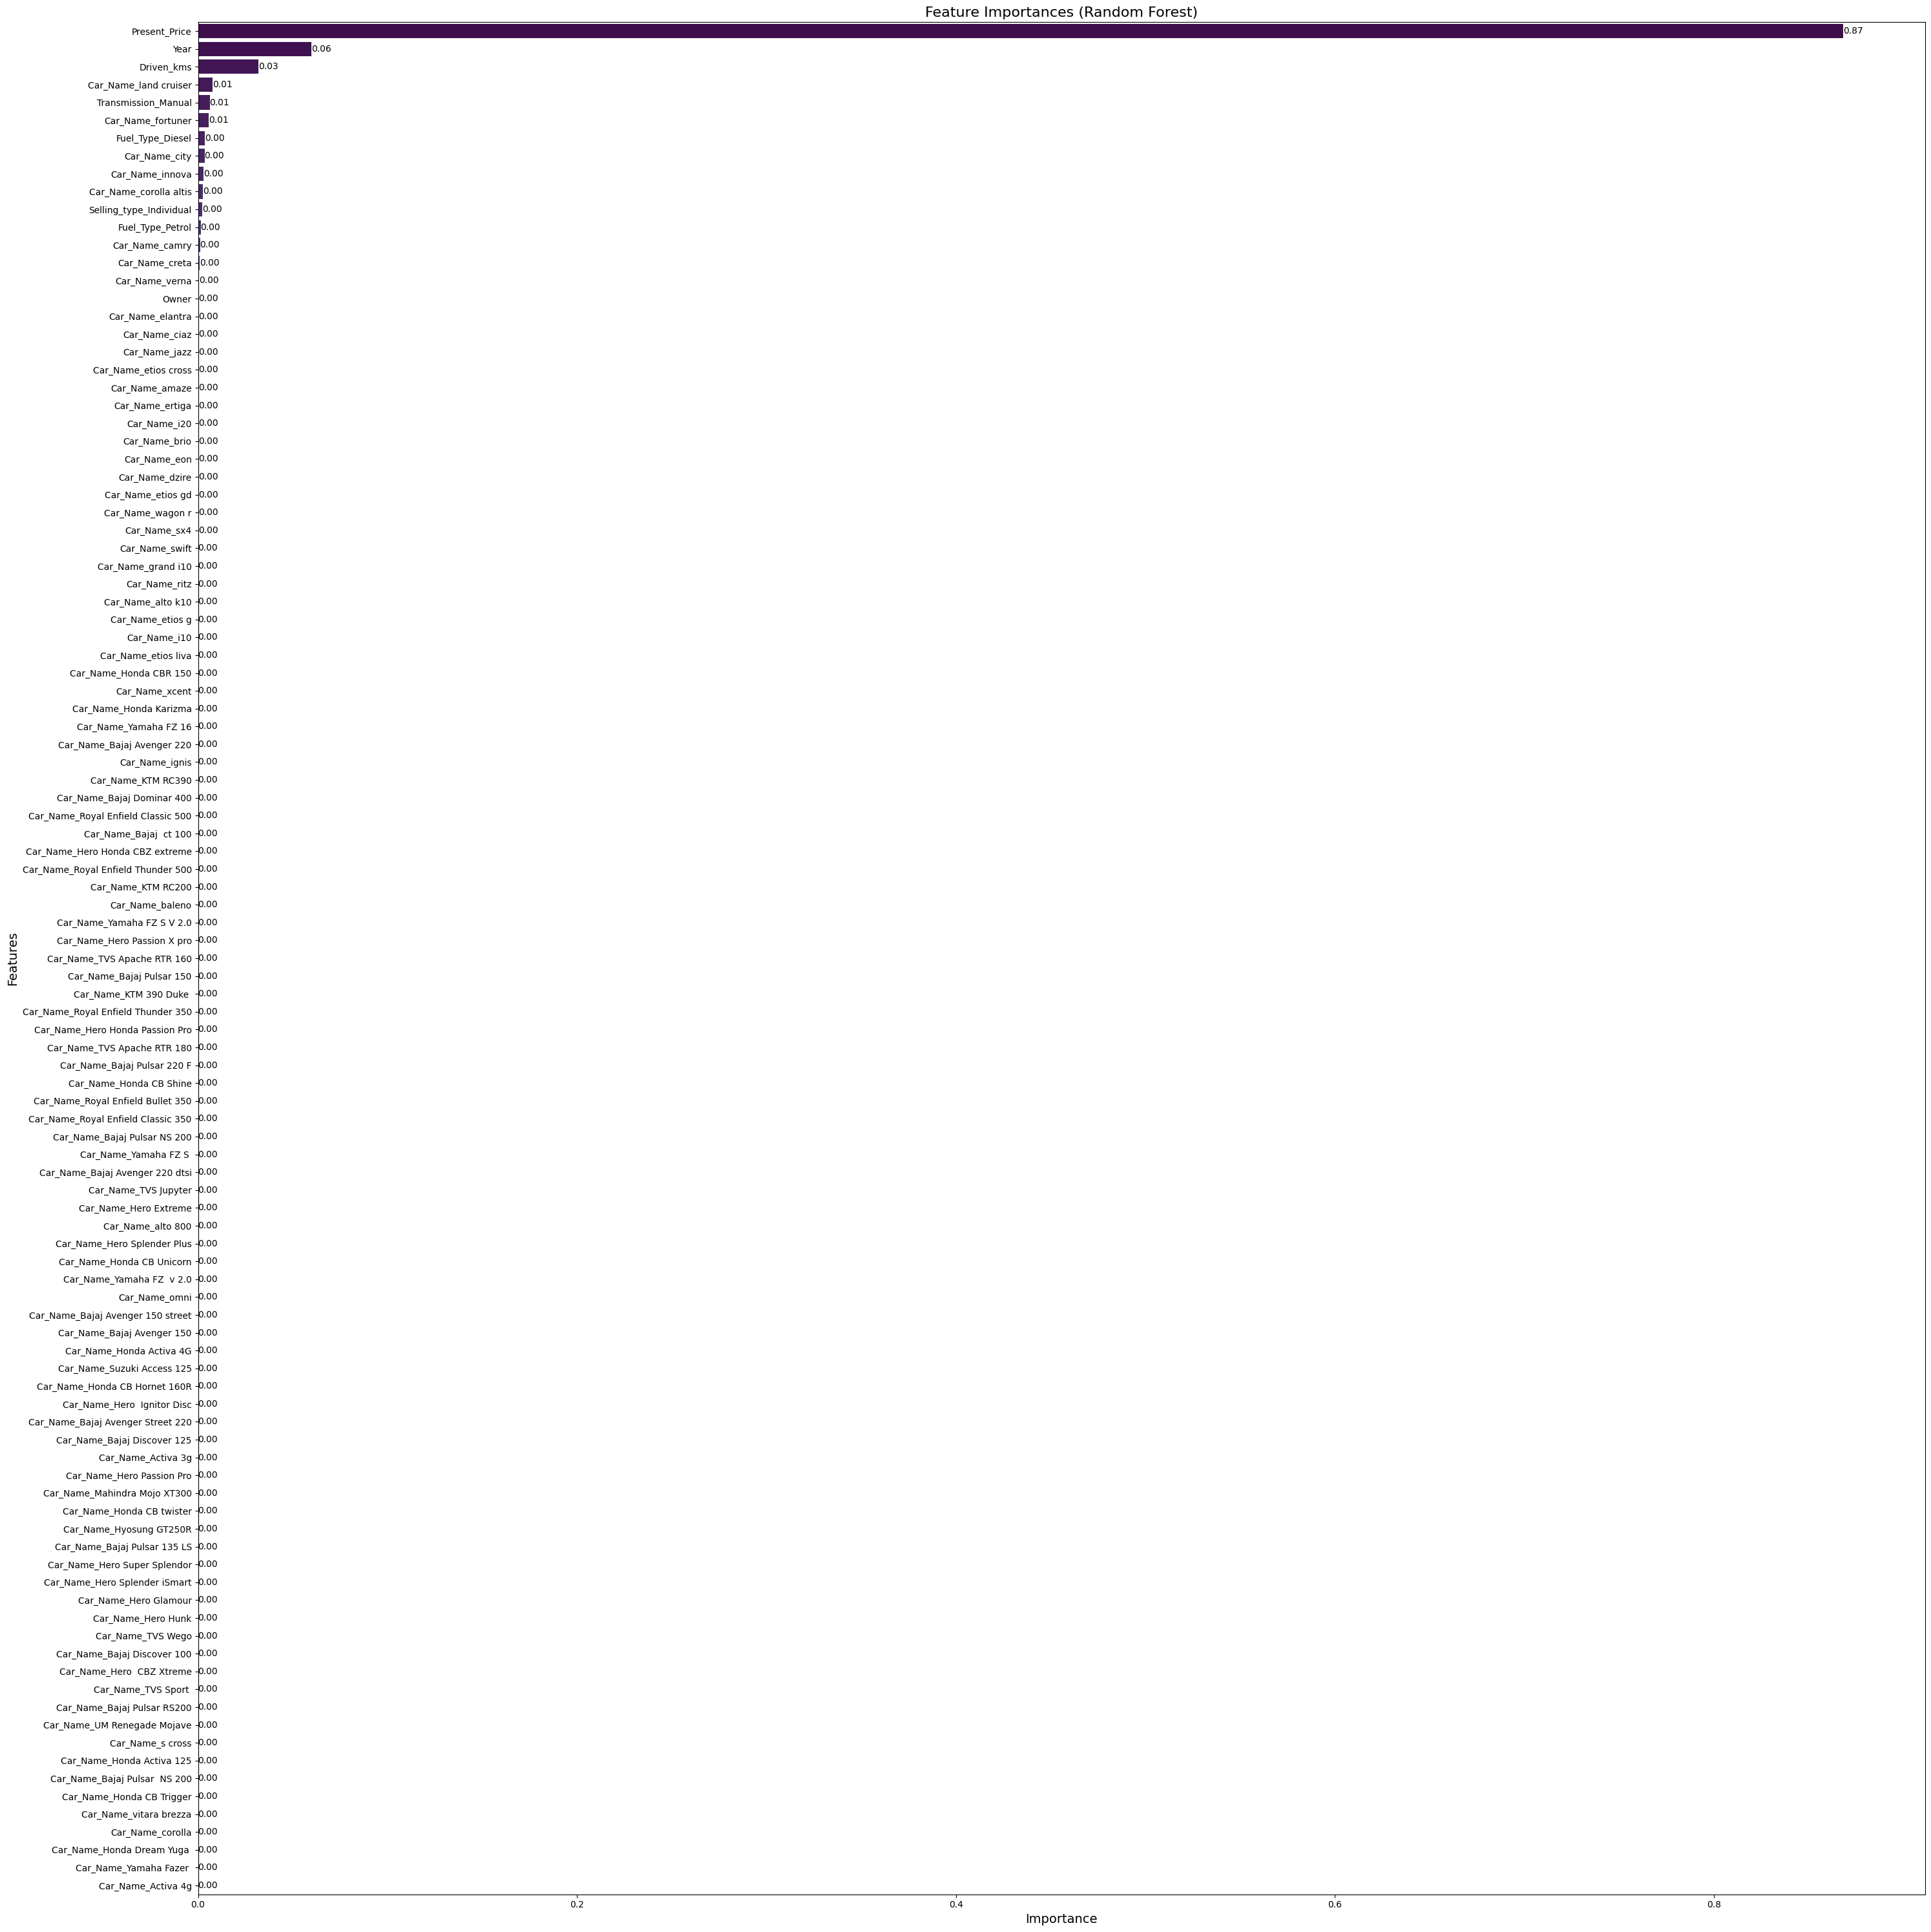

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# lets see the visualization of Feature Importances
plt.figure(figsize=(30, 30))

# Creating a horizontal bar plot
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette="viridis")

# Title and labeling
plt.title('Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adding value labels to the bars
for index, value in enumerate(feature_importances.importance):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

# Adjusting layout to ensure everything fits without overlapping
plt.tight_layout()

# Displaying the plot
plt.show()
